# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('C:/Users/bwara/Jupyter-workspace/.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $84438.49
The current value of your 5.3 ETH is $11399.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200

my_spy = 50 

# Set current amount of shares data
shares_data = {
    "shares": [200, 50]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,200
SPY,50


In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                            open    high    low   close   volume    open   
time                                                                       
2021-03-15 00:00:00-04:00  113.6  114.01  113.6  113.94  4210749  394.33   

                                                              
                              high     low   close    volume  
time                                                          
2021-03-15 00:00:00-04:00  396.685  392.03  396.47  64471980

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.94
Current SPY closing price: $396.47


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19823.50
The current value of your 200 AGG shares is $22788.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
Amount_data = {
    "Amount": [93479.99, 42611.50]
}
Data = ["Crypto", "Shares"]

df_savings = pd.DataFrame(Amount_data, index=Data)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,93479.99
Shares,42611.50


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

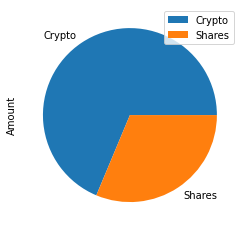

In [12]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

# Validate saving health
# YOUR CODE HERE!

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-15', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df


# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2017-03-24 00:00:00-04:00  108.35  108.51  108.3100  108.370  2249110  234.38   
2017-03-27 00:00:00-04:00  108.65  108.71  108.5345  108.605  1811277  231.93   
2017-03-28 00:00:00-04:00  108.63  108.68  108.3500  108.380  1804002  233.27   
2017-03-29 00:00:00-04:00  108.48  108.62  108.4600  108.600  1635068  235.01   
2017-03-30 00:00:00-04:00  108.52  108.58  108.3800  108.410  1611863  235.49   

                                                              
                             high      low   close    volume  
time                                                          
2017-03-24 00:00:00-04:00  235.04  232.960  233.90  82201507  
2017-03-27 00:00:00-04:00  233.92  231.610  233.58  67180329  
2017-03-28 00:00:00-04:00  235.81  233.140  235.27  64554450  
2017-03-29 00:00:00-04:00  235.81  234.725  235.59  40664024  
2017-03-30 00:00:00-04:00  236.52  235.270  236.27  40604487

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252*30
)



In [17]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2017-03-24 00:00:00-04:00  108.35  108.51  108.3100  108.370  2249110   
2017-03-27 00:00:00-04:00  108.65  108.71  108.5345  108.605  1811277   
2017-03-28 00:00:00-04:00  108.63  108.68  108.3500  108.380  1804002   
2017-03-29 00:00:00-04:00  108.48  108.62  108.4600  108.600  1635068   
2017-03-30 00:00:00-04:00  108.52  108.58  108.3800  108.410  1611863   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-03-24 00:00:00-04:00          NaN  234.38  235.04  232.960  233.90   
2017-03-27 00:00:00-04:00     0.002168  231.93  233.92  231.610  233.58   
2017-03-28 00:00:00-04:00    -0.002072  233.27  235.81  233.140  235.27   
2017-03-29 00:00:00-04:00     0.002030  235.01  235.81  234.725  235.59   
2017-03-30 00:00:00-04:00    -0.001750  235.49  236.52  235.270  236.27   

                                                  
                             volume daily_return  
time                                              
2017-03-24 00:00:00-04:00  82201507          NaN  
2017-03-27 00:00:00-04:00  67180329    -0.001368  
2017-03-28 00:00:00-04:00  64554450     0.007235  
2017-03-29 00:00:00-04:00  40664024     0.001360  
2017-03-30 00:00:00-04:00  40604487     0.002886

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997832,1.003888,1.002893,1.005969,1.000805,1.003069,1.008163,0.987652,0.994847,1.007292,...,0.996478,0.999091,0.999181,0.991340,1.005507,0.992298,0.996923,1.002760,1.005828,0.993177
2,0.998406,1.011659,0.999247,0.994161,1.012383,1.009432,1.011643,0.991068,0.995043,0.997386,...,0.989971,0.994876,1.016692,0.989876,0.996534,1.001461,1.008282,1.002012,1.010300,0.997559
3,0.998900,1.010615,1.001398,0.993093,1.013760,1.016107,1.015628,0.993976,1.007466,0.995799,...,0.979654,0.991490,1.020713,0.991338,0.980131,1.001719,1.001382,1.006587,1.011921,1.001868
4,0.998157,1.014478,0.999357,0.988499,1.015114,1.012908,1.013761,0.992102,1.015670,1.002958,...,0.989738,0.991507,1.022932,0.983977,0.989517,1.008356,1.000611,1.001274,1.007927,0.992482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.816943,4.885491,13.479827,14.092867,10.386469,13.773280,12.595374,11.754190,5.208694,15.135738,...,10.319248,13.851346,4.363336,9.344350,18.799961,9.212137,11.636619,7.757939,4.400471,3.962062
7557,8.884164,4.909515,13.441620,14.070289,10.361172,13.706945,12.545924,11.727438,5.216572,15.358710,...,10.311575,13.893050,4.302922,9.399253,18.857519,9.117383,11.656605,7.794347,4.379669,3.956189
7558,8.830581,4.862420,13.456734,14.063175,10.251291,13.577434,12.627397,11.712512,5.223521,15.097364,...,10.301537,13.758789,4.306808,9.323932,18.928595,9.116945,11.534038,7.842440,4.407963,3.946037
7559,8.831375,4.877945,13.471511,13.749378,10.298064,13.636930,12.507014,11.781132,5.228851,15.085285,...,10.338869,13.747677,4.276804,9.279819,18.996992,9.150101,11.556321,7.854117,4.450279,4.018566


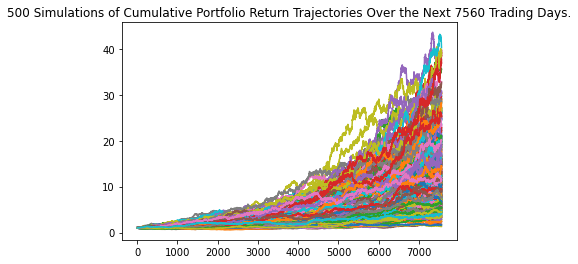

In [19]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

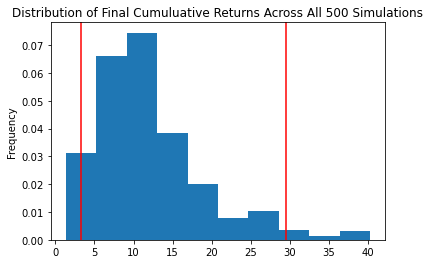

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             11.996188
std               6.922595
min               1.333871
25%               7.125842
50%              10.355797
75%              14.986067
max              40.279706
95% CI Lower      3.336274
95% CI Upper     29.488026
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $66725.49 and $589760.52


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $100088.23 and $884640.78


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997826,1.002344,1.002490,1.006427,0.999904,0.996924,0.997399,1.012995,1.000813,0.987029,...,1.010670,0.997711,0.998357,0.999228,1.000279,1.002005,0.997967,0.998874,0.995908,1.005432
2,0.996338,1.010964,0.999405,1.012065,0.997497,0.995594,0.988253,1.023574,0.989884,0.984057,...,1.016488,1.001934,0.998183,0.996892,1.003749,1.007352,0.993357,1.000429,0.999441,1.004485
3,1.000569,1.018092,0.997044,1.008111,0.995437,0.999182,0.989005,1.033217,0.977566,0.977555,...,1.022012,1.000984,0.990941,0.995617,1.008946,1.007782,0.994604,0.995201,0.996518,1.002707
4,1.002074,1.013844,0.988760,1.011213,0.995815,1.002337,0.990942,1.037540,0.981850,0.976356,...,1.022381,1.005783,1.000240,1.000230,1.001498,1.011013,1.005316,0.999550,0.999690,1.014004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.450434,0.996004,1.681233,1.373199,1.330386,1.264512,1.670783,1.780332,2.362034,0.936410,...,1.199488,1.422386,1.922982,1.440752,1.363763,1.253567,1.454018,1.799839,1.464237,1.359790
1257,1.443031,0.988214,1.675817,1.375756,1.335180,1.270036,1.691268,1.802499,2.355244,0.937865,...,1.182809,1.421157,1.900971,1.435787,1.372232,1.265380,1.455524,1.797778,1.467029,1.364588
1258,1.442952,0.988015,1.673463,1.389168,1.333241,1.281292,1.686197,1.822958,2.360591,0.941928,...,1.174075,1.422989,1.902156,1.424700,1.369886,1.274824,1.473679,1.819051,1.463179,1.357771
1259,1.443498,0.985773,1.678256,1.384422,1.324003,1.274993,1.674381,1.830230,2.345179,0.949722,...,1.162018,1.412038,1.895644,1.444403,1.378598,1.279548,1.473581,1.811724,1.481700,1.359420


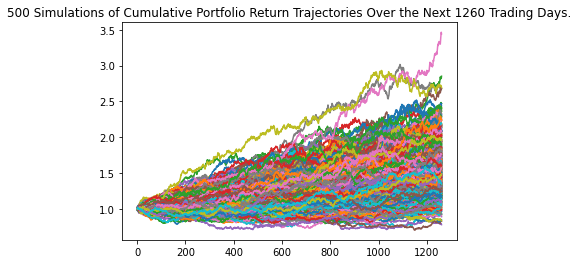

In [34]:
# Plot simulation outcomes
line_plot = MC_five_year_dist.plot_simulation()

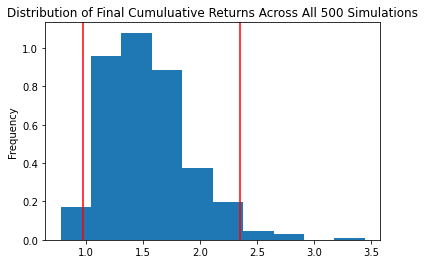

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year_dist.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_five_year_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              1.535419
std               0.364132
min               0.777244
25%               1.277520
50%               1.476091
75%               1.745732
max               3.442469
95% CI Lower      0.977745
95% CI Upper      2.345769
Name: 1260, dtype: float64


In [38]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(even_tbl_five[8]*60000,2)
ci_upper = round(even_tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58664.7 and $140746.13


### Ten Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252*10
)


In [40]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002208,0.998808,0.999928,1.000980,1.001421,0.993793,1.009967,0.999119,0.984727,1.004390,...,0.999129,0.998891,0.998519,1.001701,1.008761,1.003717,0.990111,1.009755,1.004747,1.001336
2,1.003258,1.002208,0.988935,1.000862,0.996328,0.980686,1.019314,0.990068,0.989883,0.992820,...,1.000227,1.007839,0.988746,1.007508,0.999350,1.009246,0.994711,1.003026,1.009787,1.003151
3,1.012293,0.994336,0.980771,1.006770,0.996367,0.977889,1.012658,0.990156,0.993591,0.998439,...,1.005704,1.006662,0.973088,1.005193,0.992922,1.016301,0.981649,1.007722,1.010183,1.011736
4,1.009270,1.004867,0.976343,0.998998,1.001045,0.978821,1.021589,0.995601,0.990920,1.002008,...,1.009768,1.007614,0.976472,1.010135,0.995782,1.013327,0.979279,1.001074,1.004639,1.006269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.853292,3.489940,1.364233,2.272080,1.741102,1.437970,1.888362,1.716568,1.395057,1.462808,...,1.948512,1.550216,1.990655,3.086351,3.400767,2.437144,2.386287,2.492895,2.897743,2.643263
2517,2.850760,3.452687,1.361321,2.284065,1.746628,1.434846,1.894238,1.715506,1.416975,1.457331,...,1.955860,1.558303,1.986165,3.072736,3.417654,2.458879,2.365696,2.500303,2.903975,2.667225
2518,2.848551,3.431647,1.367133,2.268000,1.736206,1.431377,1.872777,1.730121,1.413650,1.451752,...,1.938722,1.566212,1.967331,3.092060,3.430741,2.455319,2.384903,2.498684,2.903126,2.680154
2519,2.844055,3.444168,1.367171,2.274450,1.730269,1.415697,1.867443,1.753659,1.397045,1.455407,...,1.947202,1.577385,1.955138,3.078948,3.456659,2.455670,2.415591,2.485047,2.909094,2.696281


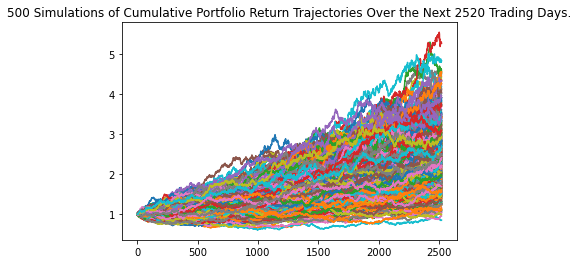

In [41]:
# Plot simulation outcomes
line_plot = MC_ten_year_dist.plot_simulation()

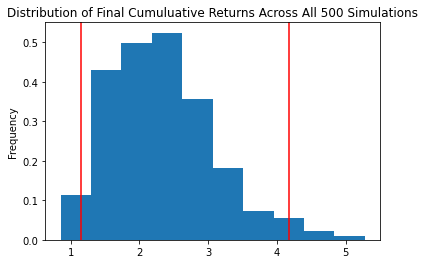

In [42]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year_dist.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_ten_year_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              2.332003
std               0.755252
min               0.853211
25%               1.772021
50%               2.260396
75%               2.769843
max               5.278292
95% CI Lower      1.154515
95% CI Upper      4.170974
Name: 2520, dtype: float64


In [45]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(even_tbl_ten[8]*60000,2)
ci_upper = round(even_tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $69270.9 and $250258.44
